In [1]:
 import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import time
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

In [4]:
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score
from sklearn.metrics import confusion_matrix,roc_auc_score,classification_report,precision_score,recall_score,roc_curve,auc,accuracy_score,f1_score
#from imblearn.over_sampling import SMOTE
from collections import Counter

In [5]:
!pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)


In [6]:
df = pd.read_csv('corona_tested_individuals_ver_0083.english.csv')

In [7]:
df

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
2742591,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742592,2020-03-11,0,0,0,0,0,negative,NaN,female,Other
2742593,2020-03-11,0,0,0,0,0,other,NaN,male,Other
2742594,2020-03-11,0,0,0,0,0,negative,NaN,female,Other


In [8]:
df.shape

(2742596, 10)

In [9]:
df.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


# Dataset Discription

1. test_date ==> Date for covid 19 test 
2. cught ==> is the patience having cough or not (binary variable yes=1, no=0)
3. fever ==> is the patience having fever or not (binary variable yes=1, no=0)
4. sore_throat ==> is the patience having sore_throat or not (binary variable yes=1, no=0)
5. shortness_of_breadth ==> is the patience having shortness_of_breadth or not (binary variable yes=1, no=0)
6. head_ache ==> is the patience having head_ache or not (binary variable yes=1, no=0)
7. corona_result ==> is the patience having corona_result or not (categorical variable -ve for covid,+ve for covid, other=> no confirmation with covid or not)  *self encoded* **(1= +ve, 0= -ve)**
8. gender ==> is the patience having gender or not (categorical variable male,female)   *self encoded* **(1= male, 0=female)**
9. test_indication ==> is the patience having gender or not (categorical variable contact_with_confirm=> covid due to contact of covid 19 person, abord=> covid in other country, other=>no idea about covid infection)

In [11]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Descriptive statistics 

In [12]:
df.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2742596.000,2742596.000,2742596.000,2742596.000,2742596.000
mean,0.041,0.035,0.011,0.004,0.022
std,0.197,0.185,0.104,0.063,0.146
min,0.000,0.000,0.000,0.000,0.000
25%,0.000,0.000,0.000,0.000,0.000
50%,0.000,0.000,0.000,0.000,0.000
75%,0.000,0.000,0.000,0.000,0.000
max,1.000,1.000,1.000,1.000,1.000


1. as we have already encoded data in binary form so there is no need to worry about th2.e outliers and statistical analysis
2. the remaningin data is also in categorical form hence we have to encode that data in same way.

# Null value imputation

In [13]:
def features_unique(feature):
    print('Feature is : ',feature)
    print('\nValue count of feature with unique values are : ')
    print(df[feature].value_counts())
    
    print('\nNull values in {} are : '.format(feature))
    print(df[feature].isna().sum(),'\n')    
    
    print('='*50)
    print('\n')
    

In [14]:
for i in df.columns:
    features_unique(i)

Feature is :  test_date

Value count of feature with unique values are : 
2020-09-17    36557
2020-09-24    33271
2020-09-22    32491
2020-09-23    32331
2020-09-15    31323
              ...  
2020-03-14      732
2020-05-16      703
2020-03-12      636
2020-05-23      597
2020-03-11      365
Name: test_date, Length: 247, dtype: int64

Null values in test_date are : 
0 



Feature is :  cough

Value count of feature with unique values are : 
0    2631258
1     111338
Name: cough, dtype: int64

Null values in cough are : 
0 



Feature is :  fever

Value count of feature with unique values are : 
0    2645600
1      96996
Name: fever, dtype: int64

Null values in fever are : 
0 



Feature is :  sore_throat

Value count of feature with unique values are : 
0    2712512
1      30084
Name: sore_throat, dtype: int64

Null values in sore_throat are : 
0 



Feature is :  shortness_of_breath

Value count of feature with unique values are : 
0    2731579
1      11017
Name: shortness_of_breath

In [15]:
null_age = df.age_60_and_above.isnull().sum()
null_gender = df.gender.isnull().sum()

In [16]:
total_null = null_age+null_gender
print('Total data in dataset : ' , df.shape[0])
print('Total null values in dataset : ' , total_null)

print('Total data remains if we remove all null values = ', df.shape[0]-total_null)
print('{} % of null data is present in the dataset.'.format(total_null * 100 / df.shape[0]))

Total data in dataset :  2742596
Total null values in dataset :  640530
Total data remains if we remove all null values =  2102066
23.354879829183737 % of null data is present in the dataset.


- as the null values are present in very useful and main features hence we can't fill that null values directly.
- fill null vlaues may lead to improper prediction and it will impact more.
- so as we have too much data it is ok if we drop that null values. except the null values are more than 5%.

# Univariate data analysis -

#### as we have only categorical data then there is no way to use different statistics technique and outliers detection

In [17]:
def univaritae_analysis(feature):
    print('='*50)
    print('\n', feature)
    print('\n Unique categorical values :')
    print(df[feature].nunique())
    print('\n unique categorical values with count :')
    print(df[feature].value_counts())    
    print('\n Null values ')
    print(df[feature].isna().sum())      


In [18]:
for i in df.columns:
    univaritae_analysis(i)


 test_date

 Unique categorical values :
247

 unique categorical values with count :
2020-09-17    36557
2020-09-24    33271
2020-09-22    32491
2020-09-23    32331
2020-09-15    31323
              ...  
2020-03-14      732
2020-05-16      703
2020-03-12      636
2020-05-23      597
2020-03-11      365
Name: test_date, Length: 247, dtype: int64

 Null values 
0

 cough

 Unique categorical values :
2

 unique categorical values with count :
0    2631258
1     111338
Name: cough, dtype: int64

 Null values 
0

 fever

 Unique categorical values :
2

 unique categorical values with count :
0    2645600
1      96996
Name: fever, dtype: int64

 Null values 
0

 sore_throat

 Unique categorical values :
2

 unique categorical values with count :
0    2712512
1      30084
Name: sore_throat, dtype: int64

 Null values 
0

 shortness_of_breath

 Unique categorical values :
2

 unique categorical values with count :
0    2731579
1      11017
Name: shortness_of_breath, dtype: int64

 Null val

- as the gender and age feature contains many null values as i mentioned above also so after talking with Guide and group members final decision is to drop these null values directly.

- date feature is useless for our prediction as it contains the date of covid test 

- the covid result with category **others** is not for our use as it's like we can't say if you have covid or not ( which is not our aim )

- the column names as test indication is after the covid test whic means that how the patience is affected by covid ( so for this one we can use this like travel history out of india or had patience meet someone who found covid +ve ). but as per me it is not fesible feature for covid 19 result.

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

test_date              0
cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

- Now we are left with all the data without null values

# Bivariat data analysis -

## due to large amount of data all the visulisation part is done in Tableau Bi tool.

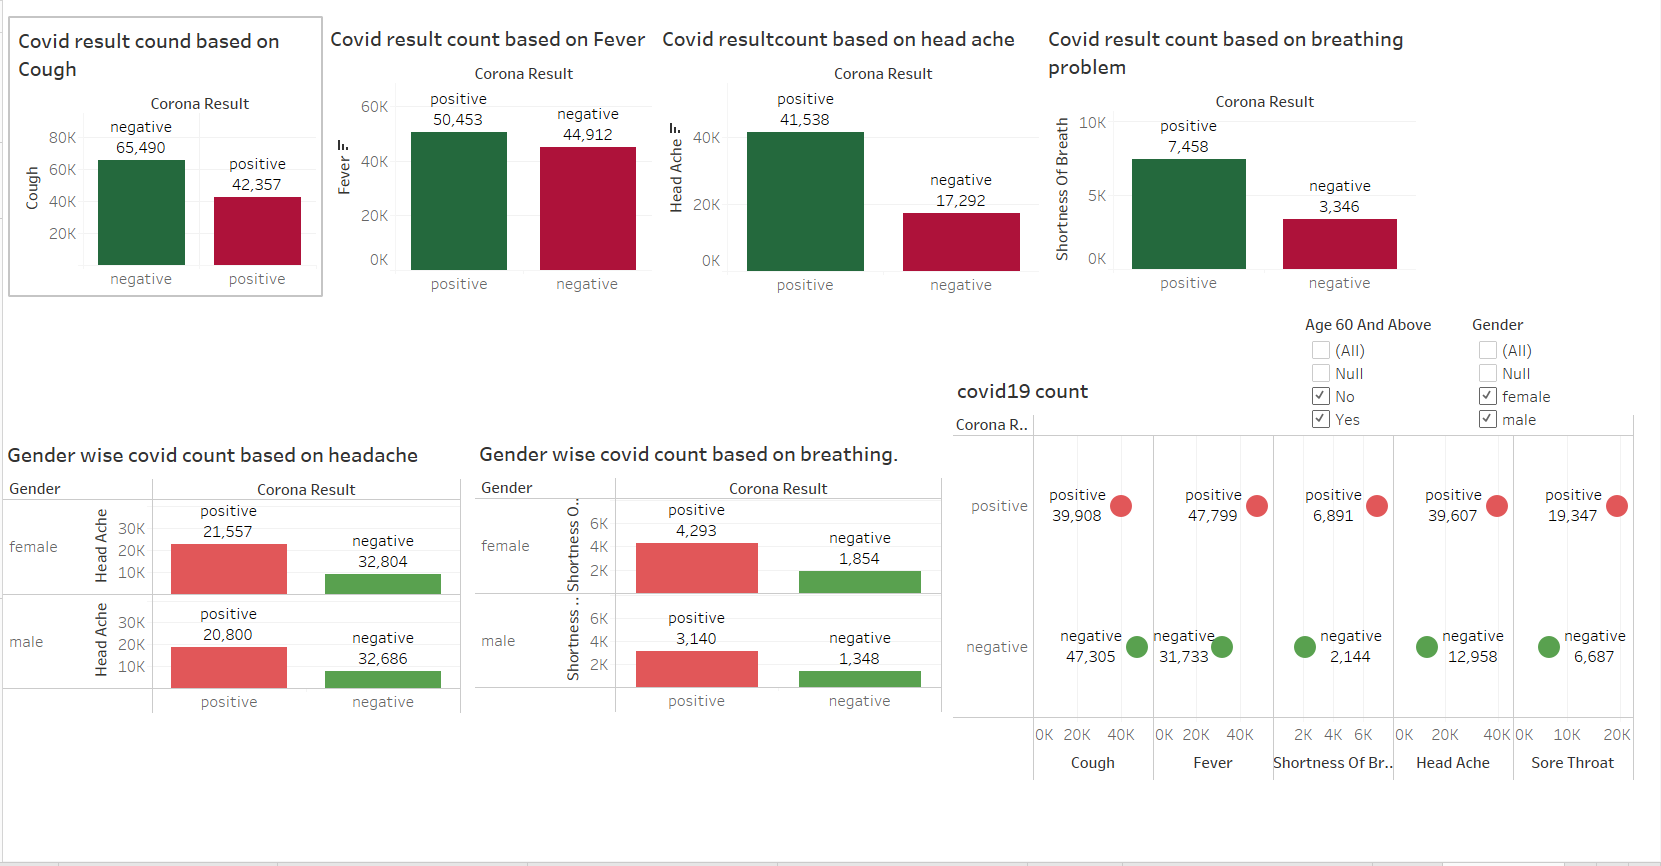

# Multivariate data analysis -

<AxesSubplot:>

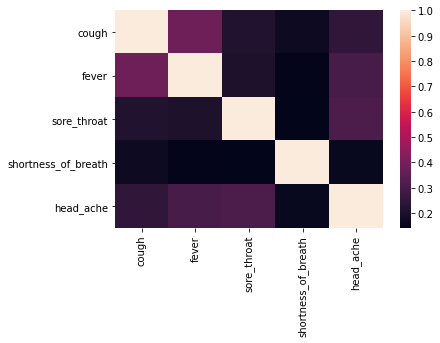

In [21]:
sns.heatmap(df.corr())

In [22]:
df.corr() # method pearson

,cough,fever,sore_throat,shortness_of_breath,head_ache
cough,1.000,0.384,0.217,0.170,0.249
fever,0.384,1.000,0.207,0.147,0.303
sore_throat,0.217,0.207,1.000,0.142,0.314
shortness_of_breath,0.170,0.147,0.142,1.000,0.162
head_ache,0.249,0.303,0.314,0.162,1.000


In [23]:
df.corr(method='spearman')

,cough,fever,sore_throat,shortness_of_breath,head_ache
cough,1.000,0.384,0.217,0.170,0.249
fever,0.384,1.000,0.207,0.147,0.303
sore_throat,0.217,0.207,1.000,0.142,0.314
shortness_of_breath,0.170,0.147,0.142,1.000,0.162
head_ache,0.249,0.303,0.314,0.162,1.000


1. by seeing the correlation matrix there is no strong corelation between featurs and it is because of categorical data 

# Data Preprocessing -
## 1. Feature elemination

In [24]:
# feature is not for our use as it consist of covid19 test date
df.drop('test_date',axis=1,inplace= True) 

In [25]:
# feature is not for our use as the data entered is after covid result.
df.drop('test_indication',axis=1,inplace=True)

## 2. Feature encoding 

In [26]:
binary = {'Yes': 1, 'No': 0}
df['age_60_and_above'] = df['age_60_and_above'].map(binary)

In [27]:
le = LabelEncoder()

In [28]:
df['gender'] = le.fit_transform(df['gender'])

In [29]:
df['corona_result'].value_counts()

negative    1943172
positive     208726
other         34329
Name: corona_result, dtype: int64

- **other** category is not for our use as it is indicating we can't say do you have covid19 or not

In [30]:
df.drop(df[df['corona_result']=='other'].index,inplace=True)

In [31]:
df.shape[0]

2151898

In [32]:
df[df['corona_result']=='other']

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender


In [33]:
df['corona_result'] = le.fit_transform(df['corona_result'])

In [34]:
df

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...
2731639,1,1,1,1,1,1,0,0
2731640,0,0,0,0,0,0,0,0
2731643,1,0,0,0,0,0,0,1
2731644,0,0,0,0,0,0,0,0


#### - now our data is ready to pass the model and perform ML building.

In [36]:
covid_pos_rate = np.sum(df.corona_result) / len(df.corona_result) *100
print('Covid +ve rate - ',covid_pos_rate)

Covid +ve rate -  9.699623309283247


#### Issue - 
1. The dataset in our hand is Imbalanced dataset.
2. The given dataset contains only 9.70 % of covid +ve data which is not sufficient for building accurate model.
3. if we use these data then our model is highly accurate for covid -ve but not for covid +ve which is wrost condition ever.
4. hence to maintain sensitivity, specipicity, and precision we need a balance dataset.
5.  to balance a dataset we are going to use either undersampling of covid -ve or oversampling of covid +ve.

## Feature Selection and Model Building

In [37]:
data = df.copy()
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1


In [38]:
X = data.drop('corona_result', axis=1 )
y = data['corona_result']

In [39]:
X.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,1
2,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1
4,0,1,0,0,0,0,1


In [40]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: corona_result, dtype: int32

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100) 

In [42]:
X_train.shape , X_test.shape, y_train.shape, y_test.shape

((1506328, 7), (645570, 7), (1506328,), (645570,))

In [43]:
X_train.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
877204,0,0,0,0,0,0,0
1332919,0,0,0,0,0,0,0
1068309,0,0,0,0,0,0,1
1624073,0,0,0,0,0,0,0
221740,0,0,0,0,0,0,1


In [44]:
y_train.head()

877204     0
1332919    0
1068309    0
1624073    0
221740     0
Name: corona_result, dtype: int32

### Calculating the feature contribution to Target variable

[0.13084417 0.30776837 0.1237994  0.04360942 0.38749042 0.00426801
 0.00222021]


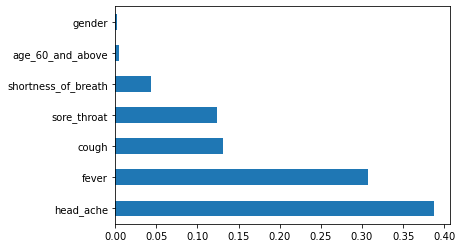

In [45]:
Xt = X
yt = y
model = ExtraTreesClassifier()
model.fit(Xt,yt)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=Xt.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

1. gender, age is not much contributing to covid result.
2. to verify which feature is significant and which is not we will be using Hypothesis testing and other feature selection technique.

##### calculating the P value to check the significane of features.

In [46]:
glm = sm.GLM(y_train,(sm.add_constant(X_train)),family=sm.families.Binomial())

In [47]:
glm.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          corona_result   No. Observations:              1506328
Model:                            GLM   Df Residuals:                  1506320
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -3.9483e+05
Date:                Mon, 20 Dec 2021   Deviance:                   7.8966e+05
Time:                        09:34:33   Pearson chi2:                 1.63e+06
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -2.7442      0.005   -566.987      0.000      -2.754      -2.735
cough                   0.9276      0.012     78.735      0.000       0.904       0.951
fever                   1.9875      0.011    175.802      0.000       1.965       2.010
sore_throat             1.9179      0.021     90.041      0.000       1.876       1.960
shortness_of_breath     1.8082      0.037     48.839      0.000       1.736       1.881
head_ache               2.6426      0.014    186.786      0.000       2.615       2.670
age_60_and_above       -0.0185      0.009     -1.994      0.046      -0.037      -0.000
gender                  0.1695      0.006     27.356      0.000       0.157       0.182
=======================================================================================
"""

#### Interpretation 
1. After performing hypothesis testing by consedring p value **gender** i am on the conclusion that all features we have are significent

### Hypothesis testing - 
- Null Hypothesis ==> all the features are not significent 
- Alternate Hypothesis ==> all the feature are significent
- alpha values ==>0.05

by Hypothesis testing 

if(p_value < alpha) then **reject Null Hypothesis**
else **Fail to reject Null Hypothesis**

                    OR
 
if(p_value > alpha then **Fail to reject Null Hypothesis**
else **reject Null Hypothesis**

In [48]:
logistic_model = LogisticRegression()

In [49]:
rfe = RFE(logistic_model,5)
rfe.fit(X_train,y_train)
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('cough', True, 1),
 ('fever', True, 1),
 ('sore_throat', True, 1),
 ('shortness_of_breath', True, 1),
 ('head_ache', True, 1),
 ('age_60_and_above', False, 3),
 ('gender', False, 2)]

In [50]:
vif = pd.DataFrame()
Xtr = X
vif['features'] = Xtr.columns
vif['VIF_Score'] = [variance_inflation_factor(Xtr.values,i) for i in range(Xtr.shape[1])]
vif['VIF_Score'] = np.round(vif['VIF_Score'],2)
vif = vif.sort_values(by = 'VIF_Score' , ascending= False)
vif

,features,VIF_Score
1,fever,1.300
0,cough,1.270
4,head_ache,1.240
2,sore_throat,1.160
6,gender,1.090
5,age_60_and_above,1.070
3,shortness_of_breath,1.060


#### Interpretation 
1. same interpretaion is given by RFE( recursive feature selection ) and ExtraTreeClassifier feature contribution score.
2. if **age** feature is not contributing more we will be dropping that feature.
3. VIF score is also in the range.

#### Conclusion
###### Feature selected-
1. cough
2. fever
3. sore_throat
4. shortness_of_breath
5. head_ache
6. age_60_and_above (on hold)

In [51]:
X_train.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
877204,0,0,0,0,0,0,0
1332919,0,0,0,0,0,0,0
1068309,0,0,0,0,0,0,1
1624073,0,0,0,0,0,0,0
221740,0,0,0,0,0,0,1


In [52]:
X_test.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender
53079,0,0,0,0,0,0,0
919553,0,0,0,0,0,0,1
1520280,0,0,0,0,0,0,0
1052239,0,0,0,0,0,0,0
825078,0,0,0,0,0,0,0


In [53]:
y_train.head()

877204     0
1332919    0
1068309    0
1624073    0
221740     0
Name: corona_result, dtype: int32

In [54]:
y_test.head()

53079      0
919553     0
1520280    0
1052239    0
825078     0
Name: corona_result, dtype: int32

In [55]:
data[(data['corona_result']==1)]

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender
136,0,0,0,0,0,1,1,0
149,0,0,0,0,0,1,0,0
181,0,0,0,0,0,1,0,1
182,0,0,0,0,0,1,0,0
195,1,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...
2731622,1,0,0,1,0,1,1,0
2731632,1,1,0,0,0,1,0,1
2731633,1,1,0,0,1,1,0,1
2731636,1,0,0,1,1,1,0,1
